In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.dates as mdates


# Load the Excel file into a DataFrame
file_path = "Trade_Georgia.xlsx"
df = pd.read_excel(file_path)

# Display the first few rows of the DataFrame

df = df.loc[:, ~df.columns.str.contains('^Unnamed')]


df.replace("-", 0, inplace=True)


df.head()



/tmp/ipykernel_1848/1950181578.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace("-", 0, inplace=True)


,Country,EU,CIS,X1995,X1996,X1997,X1998,X1999,X2000,X2001,...,I2015,I2016,I2017,I2018,I2019,I2020,I2021,I2022,I2023,I2024
0,Afghanistan,0,0,26.400,87.611,0.0,0.0,0.00000,3.78,14.77069,...,0.000000,26.488062,1.167150,680.839526,45.000609,644.645860,89.891382,10.925855,0.000000,3.663406
1,Albania,0,0,267.352,0.000,0.0,0.0,110.59570,0.00,178.17744,...,122.951538,14.190191,222.171434,140.552833,145.069121,184.931305,4967.563652,5155.039060,1730.341457,1090.941877
2,Algeria,0,0,0.000,0.000,0.0,0.0,0.00000,0.00,241.05000,...,9.761386,3.732380,7.552200,8.126782,14.088258,135.847670,59.267500,46.016000,18.352609,28.909522
3,Andorra,0,0,0.000,0.000,0.0,0.0,0.00000,0.00,0.00000,...,8.991992,0.000000,0.000000,0.000000,0.000000,2.490748,0.000000,0.000000,0.000000,30.586341
4,Angola,0,0,0.000,0.000,0.0,0.0,311.69229,0.00,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.917740,0.000000


In [2]:
# Generate YoY growth variables for X columns
for year in range(1996, 2025):
    df[f'gX{year}'] = df[f'X{year}'] / df[f'X{year-1}']

# Generate YoY growth variables for I columns
for year in range(1996, 2025):
    df[f'gI{year}'] = df[f'I{year}'] / df[f'I{year-1}']



# Display the first few rows to verify
df.head()



,Country,EU,CIS,X1995,X1996,X1997,X1998,X1999,X2000,X2001,...,gI2015,gI2016,gI2017,gI2018,gI2019,gI2020,gI2021,gI2022,gI2023,gI2024
0,Afghanistan,0,0,26.400,87.611,0.0,0.0,0.00000,3.78,14.77069,...,NaN,inf,0.044063,583.335069,0.066096,14.325270,0.139443,0.121545,0.000000,inf
1,Albania,0,0,267.352,0.000,0.0,0.0,110.59570,0.00,178.17744,...,3.301235,0.115413,15.656690,0.632632,1.032132,1.274781,26.861670,1.037740,0.335660,0.630478
2,Algeria,0,0,0.000,0.000,0.0,0.0,0.00000,0.00,241.05000,...,inf,0.382362,2.023427,1.076081,1.733559,9.642617,0.436279,0.776412,0.398831,1.575227
3,Andorra,0,0,0.000,0.000,0.0,0.0,0.00000,0.00,0.00000,...,0.380377,0.000000,NaN,NaN,NaN,inf,0.000000,NaN,NaN,inf
4,Angola,0,0,0.000,0.000,0.0,0.0,311.69229,0.00,0.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf,0.000000


In [3]:
# Calculate the share of each country in X2024 and call is SH2024

df['SHX2024'] = df['X2024'] / df['X2024'].sum() * 100

# Calculate the share of each country in I2024 and call is SH2024
df['SHI2024'] = df['I2024'] / df['I2024'].sum() * 100








In [4]:
#Leave only the countries with SHX2024 > 0.5% or SHI2024 > 0.5

df = df[(df['SHX2024'] > 0.5) | (df['SHI2024'] > 0.5)]
#Count the number of rows
print(f"Number of countries with SHX2024 > 0.5% and SHI2024 > 0.5%: {len(df)}")

#list these countries
print("Countries with SHX2024 > 0.5% and SHI2024 > 0.5%:")
print(df['Country'].tolist())


#How many EU countries are there? how many CIS?

EU_countries = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden']
CIS_countries = ['Armenia', 'Azerbaijan', 'Belarus', 'Kazakhstan', 'Kyrgyzstan', 'Moldova', 'Russia', 'Tajikistan', 'Turkmenistan', 'Uzbekistan','Ukraine']
#Count the number of EU countries
EU_count = df[df['Country'].isin(EU_countries)].shape[0]

#Count the number of CIS countries
CIS_count = df[df['Country'].isin(CIS_countries)].shape[0]
print(f"Number of EU countries: {EU_count}")

print(f"Number of CIS countries: {CIS_count}")







Number of countries with SHX2024 > 0.5% and SHI2024 > 0.5%: 37
Countries with SHX2024 > 0.5% and SHI2024 > 0.5%:
['Azerbaijan', 'Austria', 'Armenia', 'Belgium', 'Brazil', 'Bulgaria', 'Belarus', 'China', 'Czech Republic', 'France', 'Germany', 'Hong Kong', 'Hungary', 'India', 'Iran', 'Iraq', 'Israel', 'Italy', 'Japan', 'Kazakhstan', 'South Korea', 'Kyrgyzstan', 'Lithuania', 'Netherlands', 'Peru', 'Poland', 'Romania', 'Russia', 'Spain', 'Switzerland', 'Tajikistan', 'UAE', 'Turkey', 'Ukraine', 'UK', 'USA', 'Uzbekistan']
Number of EU countries: 13
Number of CIS countries: 9


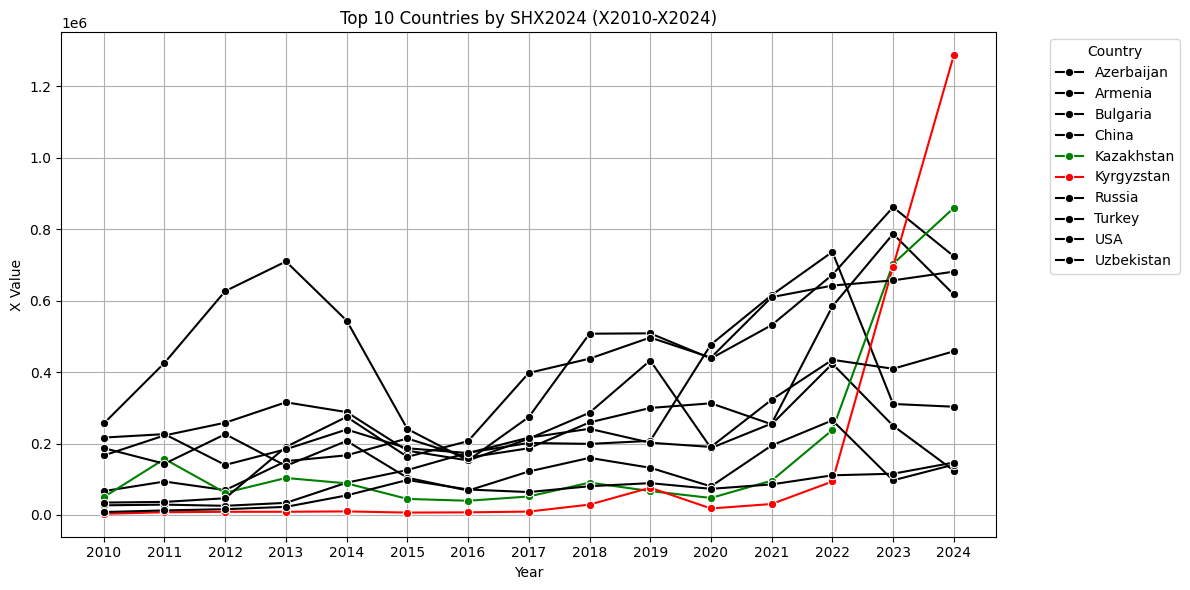

In [5]:
# Sort countries by SHX2024. then take the top 10 countries and graph their X2010-X2024 on the same graph, with each country represented by different colored line
top_10_countries = df.sort_values(by='SHX2024', ascending=False).head(10)['Country'].tolist()
# Create a new DataFrame with only the top 10 countries
top_10_df = df[df['Country'].isin(top_10_countries)]
# Melt the DataFrame to have a long format for plotting
top_10_melted = top_10_df.melt(id_vars=['Country'], value_vars=[f'X{year}' for year in range(2010, 2025)], var_name='Year', value_name='Value')
# Define custom colors for the countries
custom_palette = {
    'Kazakhstan': 'green',
    'Kyrgyzstan': 'red'
}
# Set other countries to black
for country in top_10_countries:
    if country not in custom_palette:
        custom_palette[country] = 'black'

# Pass the custom palette to seaborn
sns.set_palette(sns.color_palette([custom_palette[country] for country in top_10_melted['Country'].unique()]))
# Convert the Year column to numeric
top_10_melted['Year'] = top_10_melted['Year'].str.replace('X', '').astype(int)
# Create a line plot for the top 10 countries
plt.figure(figsize=(12, 6))
sns.lineplot(data=top_10_melted, x='Year', y='Value', hue='Country', marker='o')
plt.title('Top 10 Countries by SHX2024 (X2010-X2024)')
plt.xlabel('Year')
plt.ylabel('X Value')
plt.xticks(np.arange(2010, 2025, 1))
plt.grid()
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('Kazakhstan_Kyrgyzstan_X.png')
plt.show()





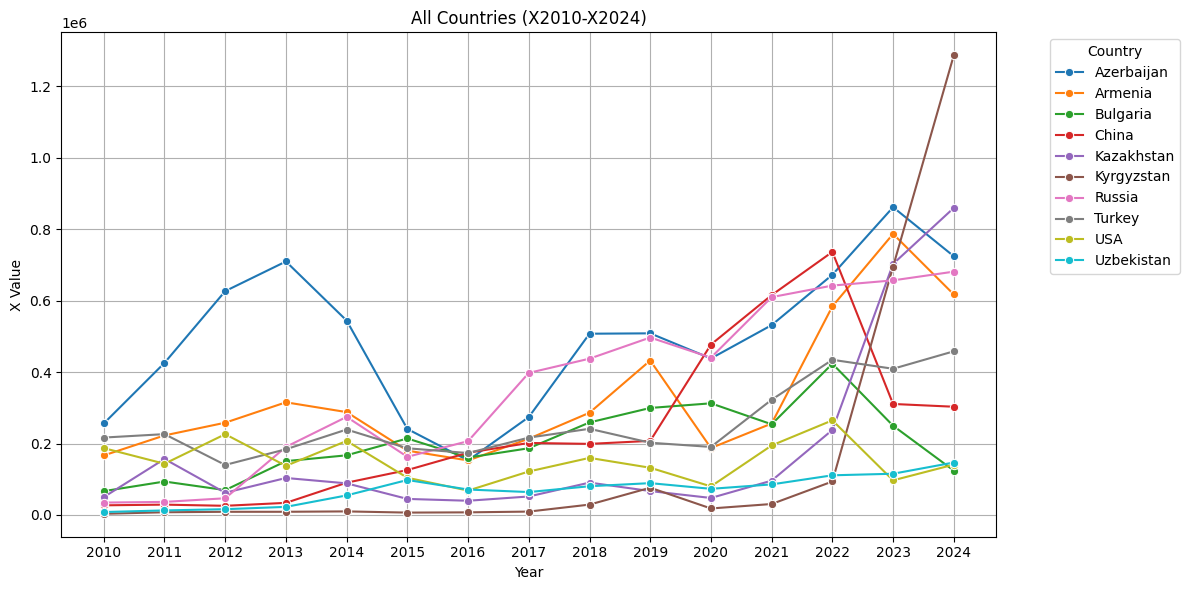

In [6]:
# Create a line plot for all countries
plt.figure(figsize=(12, 6))
sns.lineplot(data=top_10_melted, x='Year', y='Value', hue='Country', marker='o', palette='tab10')
plt.title('All Countries (X2010-X2024)')
plt.xlabel('Year')
plt.ylabel('X Value')
plt.xticks(np.arange(2010, 2025, 1))
plt.grid()
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('all_countries_X.png')
plt.show()

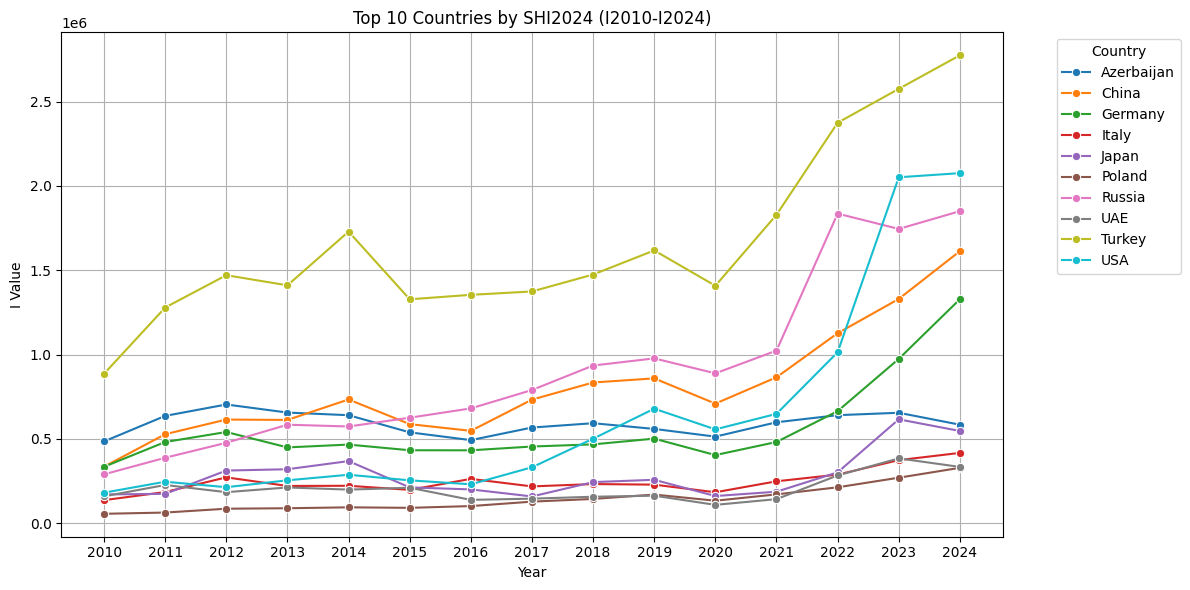

In [7]:
#Now do the same for I2010-I2024
# Sort countries by SHI2024. then take the top 10 countries and graph their I2010-I2024 on the same graph, with each country represented by different colored line
top_10_countries_I = df.sort_values(by='SHI2024', ascending=False).head(10)['Country'].tolist()
# Create a new DataFrame with only the top 10 countries
top_10_df_I = df[df['Country'].isin(top_10_countries_I)]
# Melt the DataFrame to have a long format for plotting
top_10_melted_I = top_10_df_I.melt(id_vars=['Country'], value_vars=[f'I{year}' for year in range(2010, 2025)], var_name='Year', value_name='Value')

# Don't define custom colors for the countries. Just graph
# Convert the Year column to numeric
top_10_melted_I['Year'] = top_10_melted_I['Year'].str.replace('I', '').astype(int)
# Create a line plot for the top 10 countries

# Use a colorful palette for the plot
sns.set_palette('tab10')
# Recreate the line plot for the top 10 countries with the colorful palette
plt.figure(figsize=(12, 6))
sns.lineplot(data=top_10_melted_I, x='Year', y='Value', hue='Country', marker='o')
plt.title('Top 10 Countries by SHI2024 (I2010-I2024)')
plt.xlabel('Year')
plt.ylabel('I Value')
plt.xticks(np.arange(2010, 2025, 1))
plt.grid()
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('top_10_countries_I_colorful.png')
plt.show()

<>:10: SyntaxWarning: invalid escape sequence '\d'
<>:10: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_1848/2733382149.py:10: SyntaxWarning: invalid escape sequence '\d'
  eu_melted['Year'] = eu_melted['Year'].str.extract('(\d+)').astype(int)


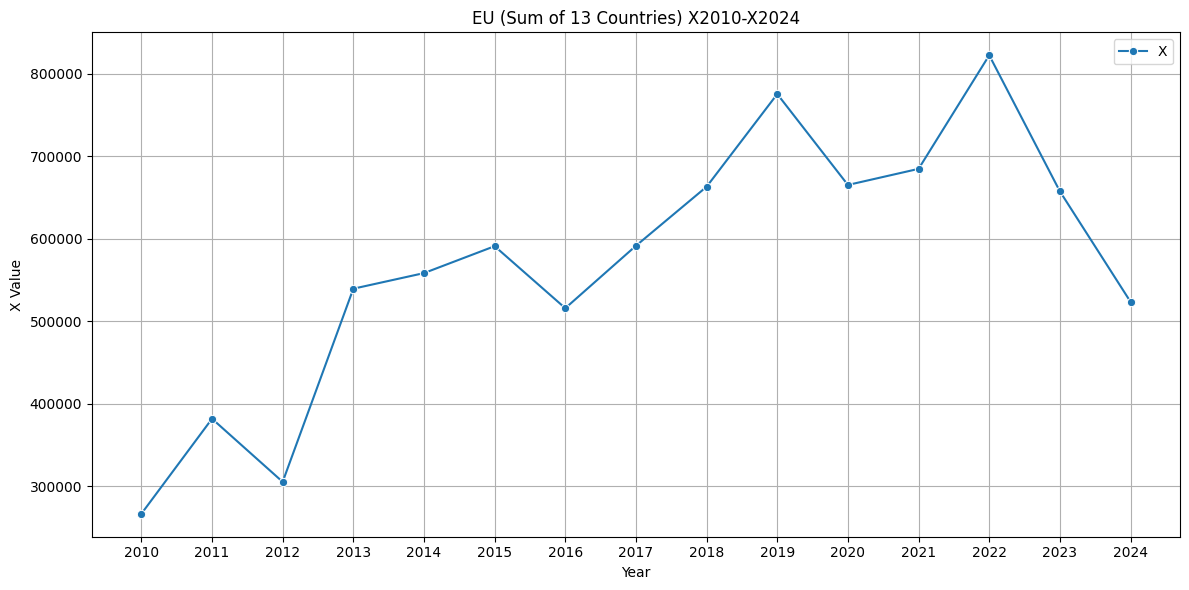

<Figure size 640x480 with 0 Axes>

In [8]:
# Filter the DataFrame for EU countries
eu_countries_df = df[df['EU'] == 1]

# Sum the data for EU countries for X2010-X2024 and I2010-I2024
eu_sum = eu_countries_df.loc[:, [f'X{year}' for year in range(2010, 2025)] + [f'I{year}' for year in range(2010, 2025)]].sum()

# Prepare data for plotting
eu_melted = eu_sum.reset_index()
eu_melted.columns = ['Year', 'Value']
eu_melted['Year'] = eu_melted['Year'].str.extract('(\d+)').astype(int)
eu_melted['Type'] = ['X' if 'X' in year else 'I' for year in eu_sum.index]

# Separate data for X and I
eu_melted_x = eu_melted[eu_melted['Type'] == 'X']
eu_melted_i = eu_melted[eu_melted['Type'] == 'I']

# Plot X2010-X2024 for EU
plt.figure(figsize=(12, 6))
sns.lineplot(data=eu_melted_x, x='Year', y='Value', marker='o', label='X')
plt.title('EU (Sum of 13 Countries) X2010-X2024')
plt.xlabel('Year')
plt.ylabel('X Value')
plt.xticks(np.arange(2010, 2025, 1))
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

# Save the figure to the specified local directory
plt.savefig(r'C:\Users\guram\OneDrive - Emory University\Emory\2nd Year\Fourth Semester\International Trade Theory - ECON-731\Project\EU_X.png')



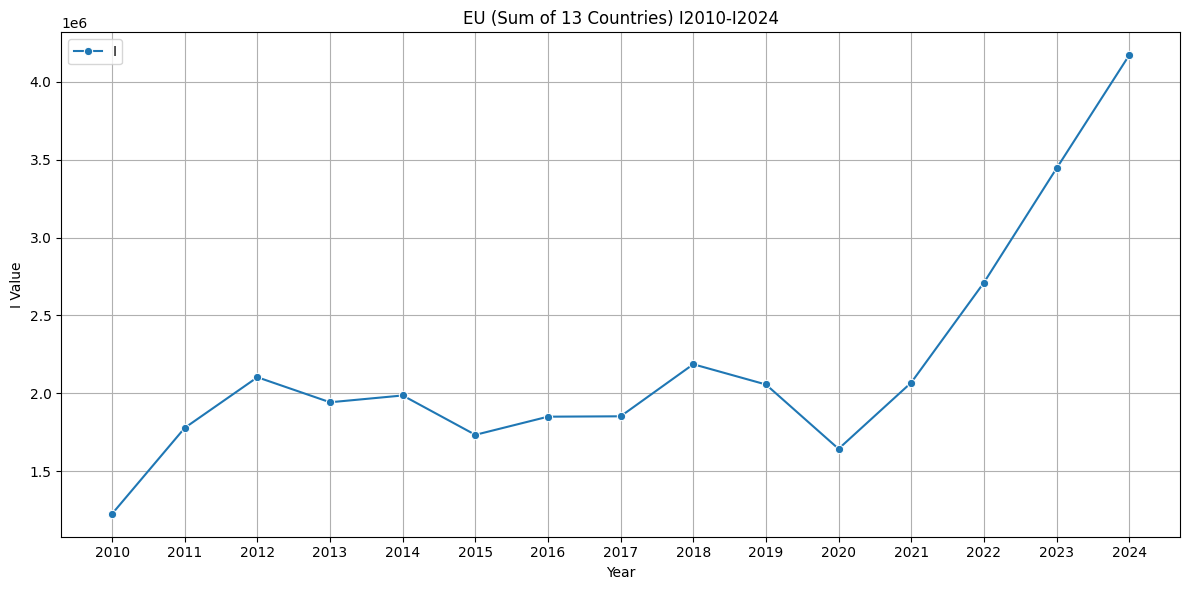

<Figure size 640x480 with 0 Axes>

In [9]:
# Plot I2010-I2024 for EU
plt.figure(figsize=(12, 6))
sns.lineplot(data=eu_melted_i, x='Year', y='Value', marker='o', label='I')
plt.title('EU (Sum of 13 Countries) I2010-I2024')
plt.xlabel('Year')
plt.ylabel('I Value')
plt.xticks(np.arange(2010, 2025, 1))
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

#Save the plots

plt.savefig('EU_I.png')

<>:10: SyntaxWarning: invalid escape sequence '\d'
<>:10: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_1848/3301153797.py:10: SyntaxWarning: invalid escape sequence '\d'
  cis_melted['Year'] = cis_melted['Year'].str.extract('(\d+)').astype(int)


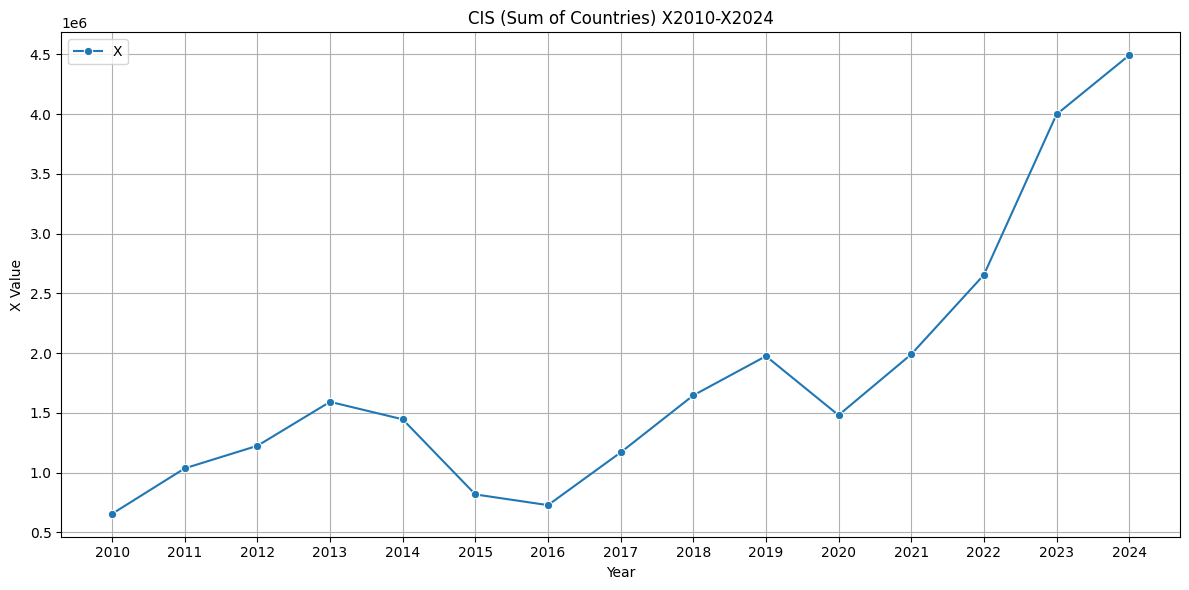

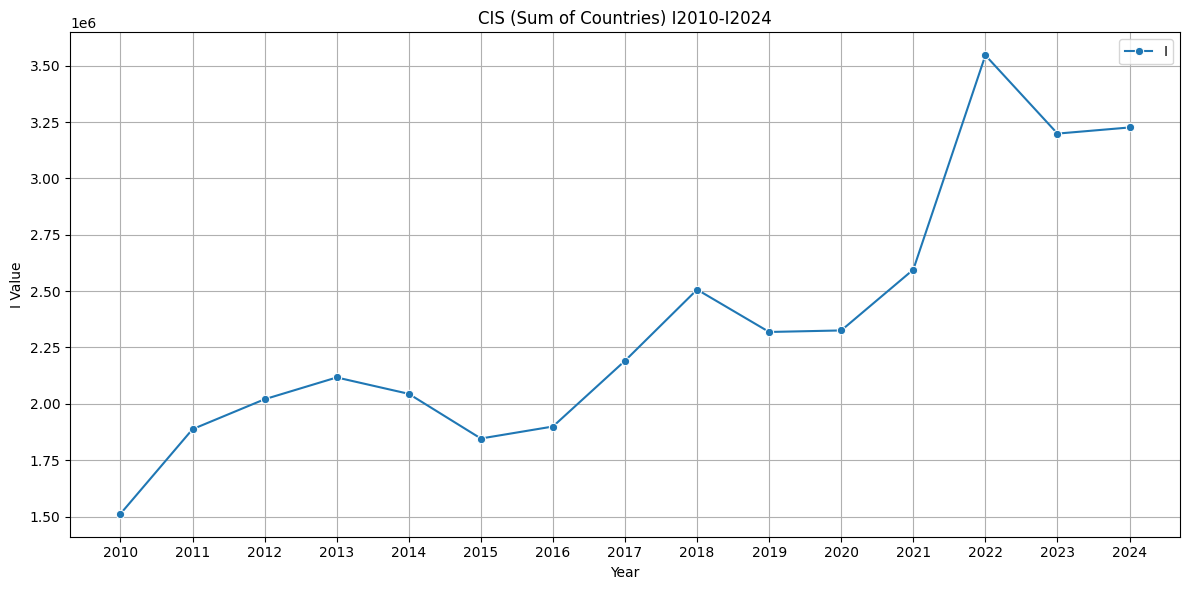

In [10]:
# Filter the DataFrame for CIS countries
cis_countries_df = df[df['CIS'] == 1]

# Sum the data for CIS countries for X2010-X2024 and I2010-I2024
cis_sum = cis_countries_df.loc[:, [f'X{year}' for year in range(2010, 2025)] + [f'I{year}' for year in range(2010, 2025)]].sum()

# Prepare data for plotting
cis_melted = cis_sum.reset_index()
cis_melted.columns = ['Year', 'Value']
cis_melted['Year'] = cis_melted['Year'].str.extract('(\d+)').astype(int)
cis_melted['Type'] = ['X' if 'X' in year else 'I' for year in cis_sum.index]

# Separate data for X and I
cis_melted_x = cis_melted[cis_melted['Type'] == 'X']
cis_melted_i = cis_melted[cis_melted['Type'] == 'I']

# Plot X2010-X2024 for CIS
plt.figure(figsize=(12, 6))
sns.lineplot(data=cis_melted_x, x='Year', y='Value', marker='o', label='X')
plt.title('CIS (Sum of Countries) X2010-X2024')
plt.xlabel('Year')
plt.ylabel('X Value')
plt.xticks(np.arange(2010, 2025, 1))
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig('CIS_X.png')
plt.show()

# Plot I2010-I2024 for CIS
plt.figure(figsize=(12, 6))
sns.lineplot(data=cis_melted_i, x='Year', y='Value', marker='o', label='I')
plt.title('CIS (Sum of Countries) I2010-I2024')
plt.xlabel('Year')
plt.ylabel('I Value')
plt.xticks(np.arange(2010, 2025, 1))
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig('CIS_I.png')
plt.show()

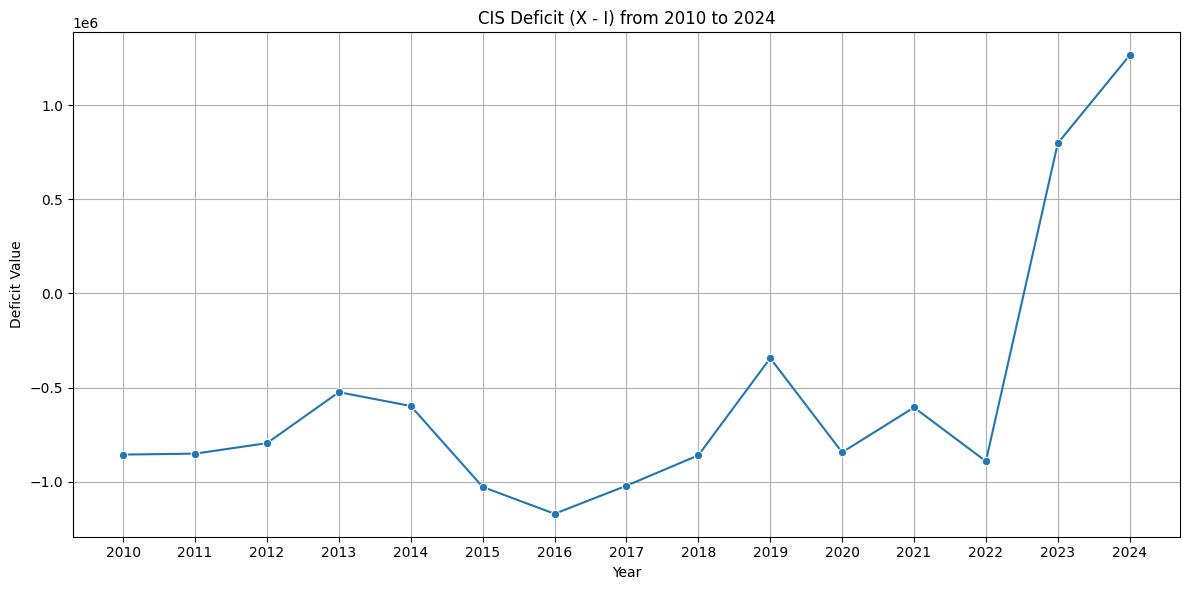

In [11]:
# Filter the CIS_melted DataFrame for X and I values
cis_x = cis_melted[cis_melted['Type'] == 'X']
cis_i = cis_melted[cis_melted['Type'] == 'I']

# Merge the X and I data on the Year column
cis_deficit = pd.merge(cis_x, cis_i, on='Year', suffixes=('_X', '_I'))

# Calculate the deficit (X - I) for each year
cis_deficit['Deficit'] = cis_deficit['Value_X'] - cis_deficit['Value_I']

# Prepare data for plotting
cis_deficit_plot = cis_deficit[['Year', 'Deficit']]

# Plot the deficit data
plt.figure(figsize=(12, 6))
sns.lineplot(data=cis_deficit_plot, x='Year', y='Deficit', marker='o')
plt.title('CIS Deficit (X - I) from 2010 to 2024')
plt.xlabel('Year')
plt.ylabel('Deficit Value')
plt.xticks(np.arange(2010, 2025, 1))
plt.grid()
plt.tight_layout()
plt.show()


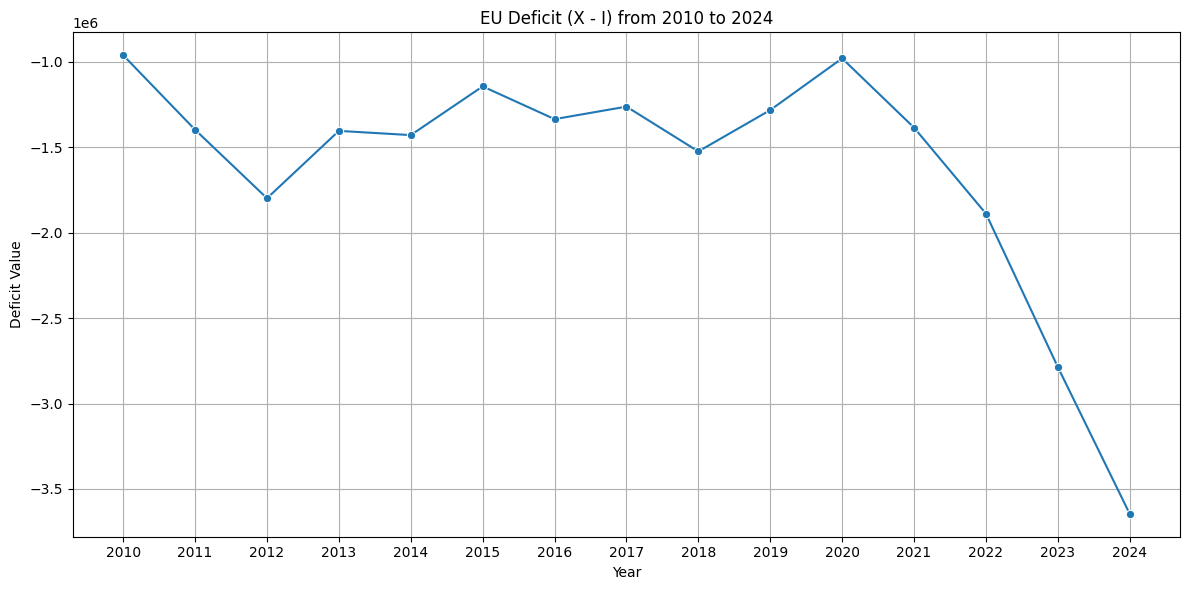

In [12]:
# Merge the X and I data for the EU on the Year column
eu_deficit = pd.merge(eu_melted_x, eu_melted_i, on='Year', suffixes=('_X', '_I'))

# Calculate the deficit (X - I) for each year
eu_deficit['Deficit'] = eu_deficit['Value_X'] - eu_deficit['Value_I']

# Prepare data for plotting
eu_deficit_plot = eu_deficit[['Year', 'Deficit']]

# Plot the deficit data
plt.figure(figsize=(12, 6))
sns.lineplot(data=eu_deficit_plot, x='Year', y='Deficit', marker='o')
plt.title('EU Deficit (X - I) from 2010 to 2024')
plt.xlabel('Year')
plt.ylabel('Deficit Value')
plt.xticks(np.arange(2010, 2025, 1))
plt.grid()
plt.tight_layout()
plt.show()

/tmp/ipykernel_1848/489801927.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eu_deficit_plot['Region'] = 'EU'
/tmp/ipykernel_1848/489801927.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cis_deficit_plot['Region'] = 'CIS'


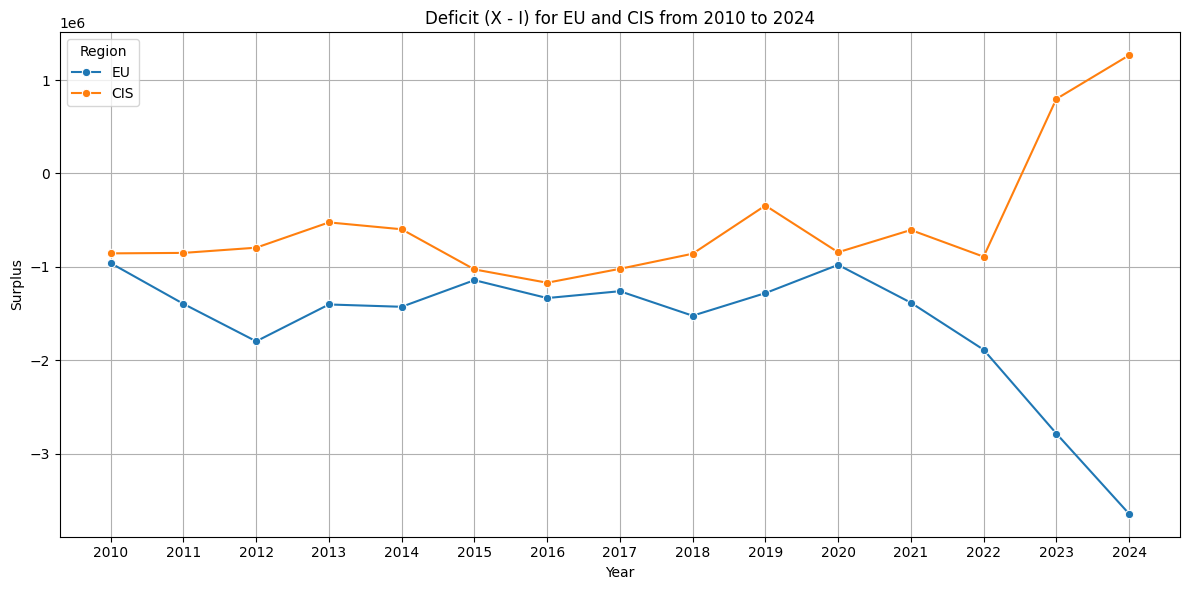

In [14]:
# Add a 'Region' column to distinguish between EU and CIS
eu_deficit_plot['Region'] = 'EU'
cis_deficit_plot['Region'] = 'CIS'

# Combine the two DataFrames
combined_deficit = pd.concat([eu_deficit_plot, cis_deficit_plot])

# Plot the combined deficit data
plt.figure(figsize=(12, 6))
sns.lineplot(data=combined_deficit, x='Year', y='Deficit', hue='Region', marker='o')
plt.title('Deficit (X - I) for EU and CIS from 2010 to 2024')
plt.xlabel('Year')
plt.ylabel('Surplus')
plt.xticks(np.arange(2010, 2025, 1))
plt.grid()
plt.tight_layout()
plt.show()